<a href="https://colab.research.google.com/github/gear-patt/Machine-Learning-Templates/blob/main/KNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/KU ML datasets/01-census-income-all.csv')

In [ ]:
df

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,No
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


## Label 
- Yes: ได้เงินเกิน 50,000
- No: ไม่ได้เงินเกิน 50,000

In [ ]:
y = df['label']

In [ ]:
df.columns

Index(['age', 'workclass', 'weight', 'education', 'edu num', 'marital status',
       'occupation', 'relationship', 'race', 'sex', 'captial-gain',
       'capital-loss', 'hours-per-week', 'native country', 'label'],
      dtype='object')

In [ ]:
df.rename(columns={'captial-gain': 'capital-gain'},inplace=True)

In [ ]:
df

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,No
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


In [ ]:
X = df[['age', 'edu num', 'capital-gain', 'capital-loss', 'hours-per-week']]
X

,age,edu num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
48837,39,13,0,0,36
48838,64,9,0,0,40
48839,38,13,0,0,50
48840,44,13,5455,0,40


##Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,age,edu num,capital-gain,capital-loss,hours-per-week
48089,54,10,7298,0,38
34253,33,9,0,0,60
26264,29,11,0,0,40
41171,42,13,0,0,40
10116,51,9,0,0,40
...,...,...,...,...,...
25074,38,5,0,0,40
13299,44,9,0,0,45
23807,25,9,0,0,30
18521,26,13,0,0,55


In [ ]:
y_train

48089    Yes
34253    Yes
26264     No
41171    Yes
10116     No
        ... 
25074     No
13299    Yes
23807     No
18521     No
20825     No
Name: label, Length: 39073, dtype: object

In [ ]:
X_test

,age,edu num,capital-gain,capital-loss,hours-per-week
24197,37,10,0,0,40
38689,45,15,7298,0,60
16167,47,9,4386,0,45
44576,22,12,0,2205,30
8332,58,10,0,0,40
...,...,...,...,...,...
19817,52,10,0,0,60
14183,31,9,4101,0,40
46447,25,13,0,0,40
13746,23,10,0,0,60


In [ ]:
y_test

24197     No
38689    Yes
16167    Yes
44576     No
8332      No
        ... 
19817    Yes
14183     No
46447     No
13746     No
24650     No
Name: label, Length: 9769, dtype: object

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
X_train.head()

,age,edu num,capital-gain,capital-loss,hours-per-week
48089,54,10,7298,0,38
34253,33,9,0,0,60
26264,29,11,0,0,40
41171,42,13,0,0,40
10116,51,9,0,0,40


In [ ]:
knn.predict([[45, 15, 1000, 0, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['No'], dtype=object)

In [ ]:
knn.predict([[40, 13, 10000, 0, 40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Yes'], dtype=object)

Predict ต้องใส่เป็นตาราง/dataframe

In [ ]:
knn.kneighbors([[40, 13, 10000, 0, 40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(array([[438.01141538, 438.07419463, 438.16663497, 438.32522172,
         520.        , 520.0057692 , 520.00865377]]),
 array([[ 1262, 14965, 32983,  8388, 38229, 37758, 22673]]))

In [ ]:
knn.predict_proba([[40, 13, 10000, 0, 40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0., 1.]])

In [ ]:
knn.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
knn.score(X_train, y_train)

0.8510992245284468

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90      7478
         Yes       0.71      0.50      0.59      2291

    accuracy                           0.84      9769
   macro avg       0.79      0.72      0.74      9769
weighted avg       0.83      0.84      0.82      9769



In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
knn7 = KNeighborsClassifier(7)

In [ ]:
cv = cross_validate(knn7, X_train, y_train, cv=5, return_train_score=True) # cv=5 means 5 folds

In [ ]:
cv

{'fit_time': array([0.06110382, 0.05969429, 0.059654  , 0.0597291 , 0.06084156]),
 'score_time': array([0.58273506, 0.58731794, 0.56605458, 0.60045028, 0.54138064]),
 'test_score': array([0.83301344, 0.82815099, 0.83339731, 0.82428974, 0.83286409]),
 'train_score': array([0.85379743, 0.8535095 , 0.84954252, 0.85258646, 0.85197863])}

In [ ]:
knn25 = KNeighborsClassifier(25)
cv25 = cross_validate(knn25, X_train, y_train, cv=5, return_train_score=True)

In [ ]:
cv25

{'fit_time': array([0.05953455, 0.0597558 , 0.06667423, 0.05980778, 0.05979133]),
 'score_time': array([0.63927817, 0.63392186, 0.62568712, 0.62835169, 0.66313338]),
 'test_score': array([0.83608445, 0.83723608, 0.83877159, 0.82979268, 0.84015869]),
 'train_score': array([0.84663126, 0.84730309, 0.84707915, 0.84762788, 0.84567645])}

In [ ]:
cv25['test_score'].mean()

0.8364086999710644

In [ ]:
cv['test_score'].mean()

0.8303431133416883

ปกติ test_score และ train_score ต่างกัน 2% ถือว่ามาก ซึ่งหมายความว่าเป็นการ overfitting

In [ ]:
knn30 = KNeighborsClassifier(30)
cv30 = cross_validate(knn30, X_train, y_train, cv=5, return_train_score=True)

In [ ]:
cv30

{'fit_time': array([0.06052041, 0.05945396, 0.05909586, 0.06366205, 0.05965972]),
 'score_time': array([0.64188075, 0.64602399, 0.65097976, 0.63671064, 0.6308043 ]),
 'test_score': array([0.83698017, 0.83851567, 0.83889955, 0.83184029, 0.84284617]),
 'train_score': array([0.84583147, 0.84602342, 0.84506366, 0.84663617, 0.8444288 ])}

In [ ]:
knn3 = KNeighborsClassifier(3)
cv3 = cross_validate(knn3, X_train, y_train, cv=5, return_train_score=True)

In [ ]:
cv3

{'fit_time': array([0.25995159, 0.10176325, 0.06006718, 0.0590837 , 0.06060433]),
 'score_time': array([2.34274912, 0.97999787, 0.53738356, 0.54319501, 0.54027605]),
 'test_score': array([0.82060141, 0.81253999, 0.82047345, 0.81149219, 0.82006655]),
 'train_score': array([0.85405336, 0.84867874, 0.85133406, 0.85245849, 0.85092293])}

In [ ]:
knn55 = KNeighborsClassifier(55)
cv55 = cross_validate(knn55, X_train, y_train, cv=5, return_train_score=True)

In [ ]:
cv55

{'fit_time': array([0.1005888 , 0.10961556, 0.06178069, 0.05958343, 0.06642389]),
 'score_time': array([1.5575726 , 1.51376534, 0.76907706, 0.72571826, 0.70060444]),
 'test_score': array([0.83442099, 0.83698017, 0.83608445, 0.83043256, 0.84195035]),
 'train_score': array([0.84042485, 0.84032888, 0.84074477, 0.84279727, 0.8388944 ])}

In [ ]:
cv30['test_score'].mean()

0.8378163707347459

In [ ]:
cv55['test_score'].mean()

0.8359737014178498

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=55).fit(X_train, y_train)

In [ ]:
final_knn.score(X_train, y_train)

0.8410667212653239

In [ ]:
final_knn.score(X_test, y_test)

0.8371378851468932

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_grid = {'n_neighbors': [5, 15, 25, 35, 45, 55, 65]}

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(),
                           parameter_grid,
                           cv=5,
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 15, 25, 35, 45, 55, 65]},
             return_train_score=True)

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.08080497, 0.06133065, 0.06111894, 0.05934167, 0.06200209,
        0.06046281, 0.07043242]),
 'mean_score_time': array([0.75037503, 0.59134502, 0.6251276 , 0.66093764, 0.69233694,
        0.73689294, 0.84522705]),
 'mean_test_score': array([0.82461019, 0.83592245, 0.8364087 , 0.83666473, 0.83692058,
        0.8359737 , 0.83535949]),
 'mean_train_score': array([0.85155991, 0.84930131, 0.84686357, 0.84432984, 0.84175134,
        0.84063803, 0.83907685]),
 'param_n_neighbors': masked_array(data=[5, 15, 25, 35, 45, 55, 65],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 15},
  {'n_neighbors': 25},
  {'n_neighbors': 35},
  {'n_neighbors': 45},
  {'n_neighbors': 55},
  {'n_neighbors': 65}],
 'rank_test_score': array([7, 5, 3, 2, 1, 4, 6], dtype=int32),
 'split0_test_score': array([0.82763916, 0.83506078, 0.83608445, 0.83582853, 0.83634037,
   

In [ ]:
grid_search.best_params_

{'n_neighbors': 45}

In [ ]:
grid_search.best_score_

0.8369205787600744

In [ ]:
grid_search.score(X_train, y_train)

0.8429350190668748

In [ ]:
grid_search.score(X_test, y_test)

0.8361142389190296

In [ ]:
X_train

,age,edu num,capital-gain,capital-loss,hours-per-week
48089,54,10,7298,0,38
34253,33,9,0,0,60
26264,29,11,0,0,40
41171,42,13,0,0,40
10116,51,9,0,0,40
...,...,...,...,...,...
25074,38,5,0,0,40
13299,44,9,0,0,45
23807,25,9,0,0,30
18521,26,13,0,0,55


The data is not preprocessed yet.

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [ ]:
std_scaler.mean_

array([  38.60514934,   10.07015074, 1083.84534077,   87.63990479,
         40.40096742])

In [ ]:
std_scaler.scale_

array([1.36818307e+01, 2.57701836e+00, 7.50987687e+03, 4.03061736e+02,
       1.23606527e+01])

In [ ]:
std_scaler.transform(X_train)

array([[ 1.125204  , -0.02722167,  0.82746425, -0.21743544, -0.19424277],
       [-0.40967831, -0.41526702, -0.14432265, -0.21743544,  1.58559851],
       [-0.70203685,  0.36082368, -0.14432265, -0.21743544, -0.03243902],
       ...,
       [-0.99439539, -0.41526702, -0.14432265, -0.21743544, -0.84145778],
       [-0.92130575,  1.13691439, -0.14432265, -0.21743544,  1.18108913],
       [-0.84821612,  1.13691439, -0.14432265, -0.21743544, -1.24596717]])

In [ ]:
X_train_transformed = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns)

In [ ]:
X_train_transformed

,age,edu num,capital-gain,capital-loss,hours-per-week
0,1.125204,-0.027222,0.827464,-0.217435,-0.194243
1,-0.409678,-0.415267,-0.144323,-0.217435,1.585599
2,-0.702037,0.360824,-0.144323,-0.217435,-0.032439
3,0.248128,1.136914,-0.144323,-0.217435,-0.032439
4,0.905935,-0.415267,-0.144323,-0.217435,-0.032439
...,...,...,...,...,...
39068,-0.044230,-1.967448,-0.144323,-0.217435,-0.032439
39069,0.394308,-0.415267,-0.144323,-0.217435,0.372070
39070,-0.994395,-0.415267,-0.144323,-0.217435,-0.841458
39071,-0.921306,1.136914,-0.144323,-0.217435,1.181089


In [ ]:
X_train_transformed.mean()

age               1.518959e-16
edu num           4.000474e-16
capital-gain      3.690222e-15
capital-loss     -3.671253e-15
hours-per-week    9.269579e-16
dtype: float64

In [ ]:
X_train_transformed.std()

age               1.000013
edu num           1.000013
capital-gain      1.000013
capital-loss      1.000013
hours-per-week    1.000013
dtype: float64

In [ ]:
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 15, 25, 35, 45, 55, 65]},
             return_train_score=True)

In [ ]:
grid_search.best_params_

{'n_neighbors': 35}

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.09729061, 0.06049938, 0.06182647, 0.06459236, 0.0605145 ,
        0.06198597, 0.06147857]),
 'mean_score_time': array([0.96630964, 0.62978802, 0.65480504, 0.68793707, 0.74018626,
        0.80470471, 0.90186839]),
 'mean_test_score': array([0.80730929, 0.81979883, 0.82443121, 0.82568523, 0.82412402,
        0.82389372, 0.82402168]),
 'mean_train_score': array([0.8400366 , 0.83620404, 0.83383666, 0.83126455, 0.8299849 ,
        0.82880121, 0.82805901]),
 'param_n_neighbors': masked_array(data=[5, 15, 25, 35, 45, 55, 65],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 15},
  {'n_neighbors': 25},
  {'n_neighbors': 35},
  {'n_neighbors': 45},
  {'n_neighbors': 55},
  {'n_neighbors': 65}],
 'rank_test_score': array([7, 6, 2, 1, 3, 5, 4], dtype=int32),
 'split0_test_score': array([0.80806142, 0.81868202, 0.82136916, 0.82277671, 0.82162508,
   

In [ ]:
grid_search.best_score_

0.8256852269521001

In [ ]:
grid_search.score(X_train_transformed, y_train)

0.8320835359455379

In [ ]:
X_test_transformed = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns)
X_test_transformed

,age,edu num,capital-gain,capital-loss,hours-per-week
0,-0.117320,-0.027222,-0.144323,-0.217435,-0.032439
1,0.467397,1.913005,0.827464,-0.217435,1.585599
2,0.613577,-0.415267,0.439708,-0.217435,0.372070
3,-1.213664,0.748869,-0.144323,5.253191,-0.841458
4,1.417563,-0.027222,-0.144323,-0.217435,-0.032439
...,...,...,...,...,...
9764,0.979025,-0.027222,-0.144323,-0.217435,1.585599
9765,-0.555858,-0.415267,0.401758,-0.217435,-0.032439
9766,-0.994395,1.136914,-0.144323,-0.217435,-0.032439
9767,-1.140575,-0.027222,-0.144323,-0.217435,1.585599


In [ ]:
grid_search.score(X_test_transformed, y_test)

0.8278227044733341

The data should be scaled before it is put in gridsearch.

In [ ]:
std_scaler.inverse_transform(X_train_transformed.iloc[[0],:])

array([[  54.,   10., 7298.,    0.,   38.]])

In [ ]:
X_train_transformed.iloc[[0],:]

,age,edu num,capital-gain,capital-loss,hours-per-week
0,1.125204,-0.027222,0.827464,-0.217435,-0.194243


In [ ]:
X_train.iloc[[0],:]

,age,edu num,capital-gain,capital-loss,hours-per-week
48089,54,10,7298,0,38


## One-hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
df

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,No
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


In [ ]:
marital_status = df[['marital status']]
marital_status

,marital status
0,Never-married
1,Married-civ-spouse
2,Divorced
3,Married-civ-spouse
4,Married-civ-spouse
...,...
48837,Divorced
48838,Widowed
48839,Married-civ-spouse
48840,Divorced


In [ ]:
mat = ohe.fit_transform(marital_status)

In [ ]:
mat.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
ohe.categories_

[array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object)]

## make_column_transformer

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
df

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,No
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


In [ ]:
X = df[['age', 'edu num', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital status', 'occupation', 'sex']]

In [ ]:
X

,age,edu num,capital-gain,capital-loss,hours-per-week,marital status,occupation,sex
0,39,13,2174,0,40,Never-married,Adm-clerical,Male
1,50,13,0,0,13,Married-civ-spouse,Exec-managerial,Male
2,38,9,0,0,40,Divorced,Handlers-cleaners,Male
3,53,7,0,0,40,Married-civ-spouse,Handlers-cleaners,Male
4,28,13,0,0,40,Married-civ-spouse,Prof-specialty,Female
...,...,...,...,...,...,...,...,...
48837,39,13,0,0,36,Divorced,Prof-specialty,Female
48838,64,9,0,0,40,Widowed,?,Male
48839,38,13,0,0,50,Married-civ-spouse,Prof-specialty,Male
48840,44,13,5455,0,40,Divorced,Adm-clerical,Male


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
transformer = make_column_transformer(

    ( StandardScaler(), ['age', 'edu num','capital-gain', 'capital-loss', 'hours-per-week'] ),

    ( OneHotEncoder(), ['marital status', 'occupation', 'sex'])

)

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)

In [ ]:
X_train_transformed

<39073x29 sparse matrix of type '<class 'numpy.float64'>'
	with 312584 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_transformed.toarray()

array([[-0.92360423, -0.03076505, -0.14477469, ...,  0.        ,
         0.        ,  1.        ],
       [-1.14235555,  0.74703044, -0.14477469, ...,  0.        ,
         0.        ,  1.        ],
       [-0.77777002,  1.13592819, -0.14477469, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.28818976, -0.4196628 , -0.14477469, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12151607,  1.13592819, -0.14477469, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.33682605,  1.52482593, -0.14477469, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 15, 25, 35, 45, 55, 65]},
             return_train_score=True)

In [ ]:
grid_search.best_score_

0.84682502541086

In [ ]:
grid_search.best_params_

{'n_neighbors': 45}

In [ ]:
y_predicted = grid_search.predict(transformer.transform(X_test))

In [ ]:
y_predicted

array(['No', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

## Other Metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
accuracy_score(y_test, y_predicted)

0.8476814412938888

In [ ]:
recall_score(y_test, y_predicted, pos_label='Yes')

0.5913621262458472

In [ ]:
precision_score(y_test, y_predicted, pos_label='Yes')

0.7385892116182573

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
confusion_matrix(y_test, y_predicted)

array([[6857,  504],
       [ 984, 1424]])

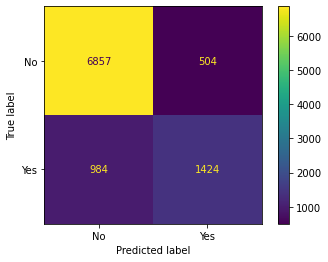

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

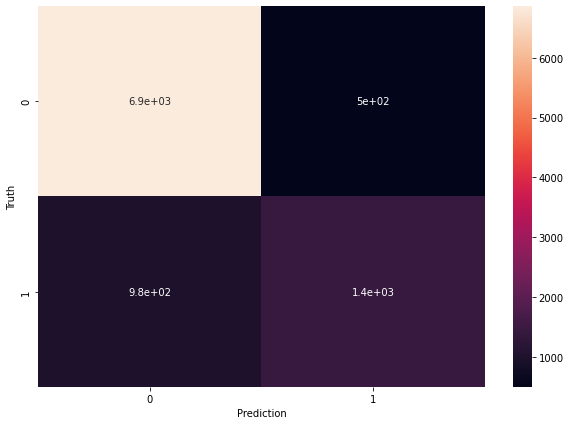

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')